<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

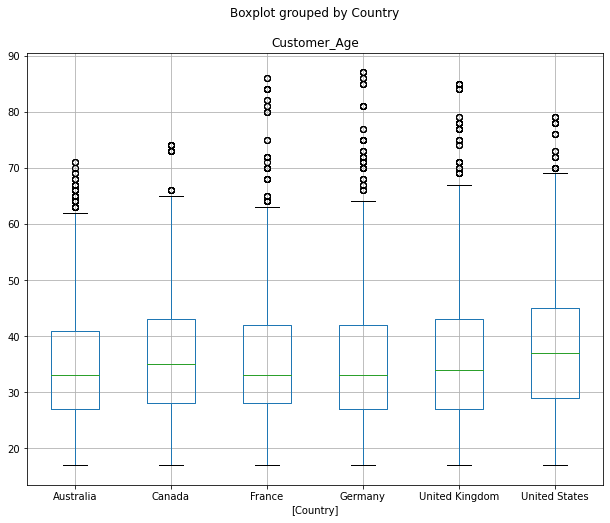

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sales = pd.read_csv('data/sales_data.csv',
                   parse_dates=['Date'])
sales.head()

#### getting mean of customer_age
# sales['Customer_Age'].mean()

#### show in  box plot
# sales['Customer_Age'].plot(kind='kde', figsize=(14,6))
# sales['Customer_Age'].plot(kind='box', vert='false', figsize=(14,10))

#### mean of order quantity
# sales['Order_Quantity'].mean()

#### show in histogram
# orderQuantity = sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,10))
# orderQuantity.set_ylabel('sales')
# orderQuantity.set_xlabel('quantity')

#### show in box plot
# orderQuantity = sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,10))

#### sales per month
# sales['Month'].value_counts()
### bar plot of sales per month
# sales['Month'].value_counts().plot(kind='bar', figsize=(14,10))

#### sales per year
# sales['Year'].value_counts()
### bar plot of sales per year
# sales['Year'].value_counts().plot(kind='bar', figsize=(14,10))

#### country with most quantity sales
# sales['Country'].value_counts().head(1)

### bar plot of quantity sales
# quantitySale = sales['Country'].value_counts().plot(kind='bar', figsize=(14,10))
# quantitySale.set_ylabel('Quantity Sale')
# quantitySale.set_xlabel('Countries')

#### list of every product sold
# sales['Product'].unique()

### bar plot of 5 most sold product
# productSold = sales['Product'].value_counts().head(5).plot(kind='bar', figsize=(14,10))
# productSold.set_ylabel('Quantity')
# productSold.set_xlabel('Product Name')

#### relationship between  unit_cost and unit_price
### scatter plot between both
# sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(10,10))

#### relationship between order_quantity and profit
# sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(10,10))

#### relationship btwn profit @ country
# sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(9,9))

#### relationship btwn customer age and country
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,8))


<AxesSubplot:>

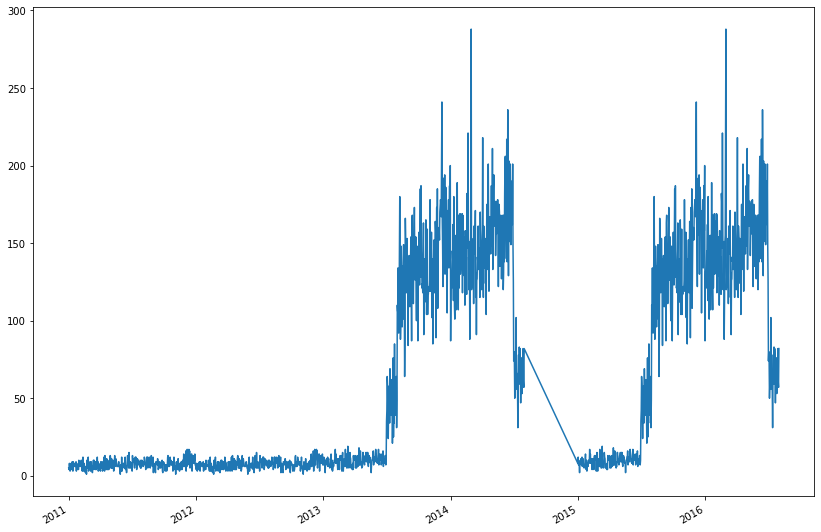

In [48]:

#### add and calculate new caLculated date col(YYYY-MM-DD)
# sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x:'{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
# sales['Calculated_Date'].head()

#### parse ur calculated_date col into datetime object
# sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
# sales['Calculated_Date'].head()

### sales evolution through the years ###
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,10))



<AxesSubplot:>

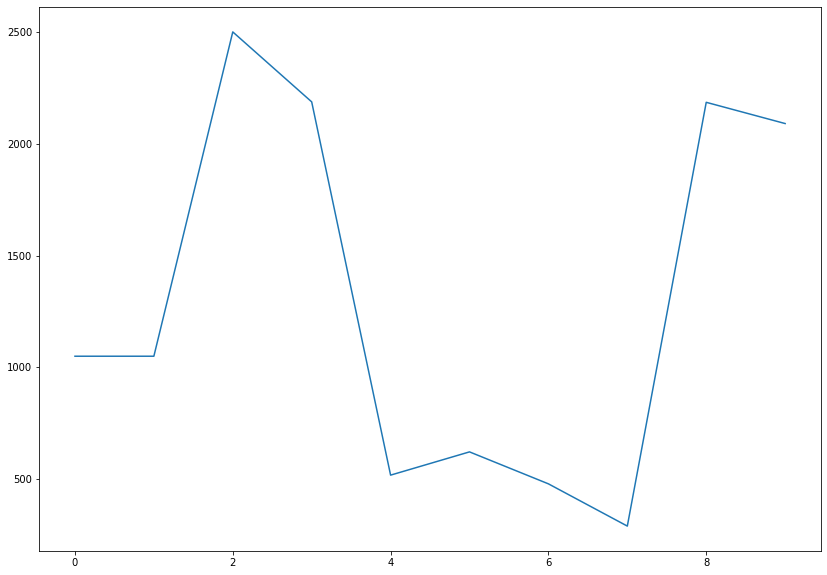

In [51]:
### increasing sales by 50$ to every sale
sales['Revenue'] += 50
sales['Revenue'].head(10).plot(kind='line', figsize=(14,10))



<AxesSubplot:>

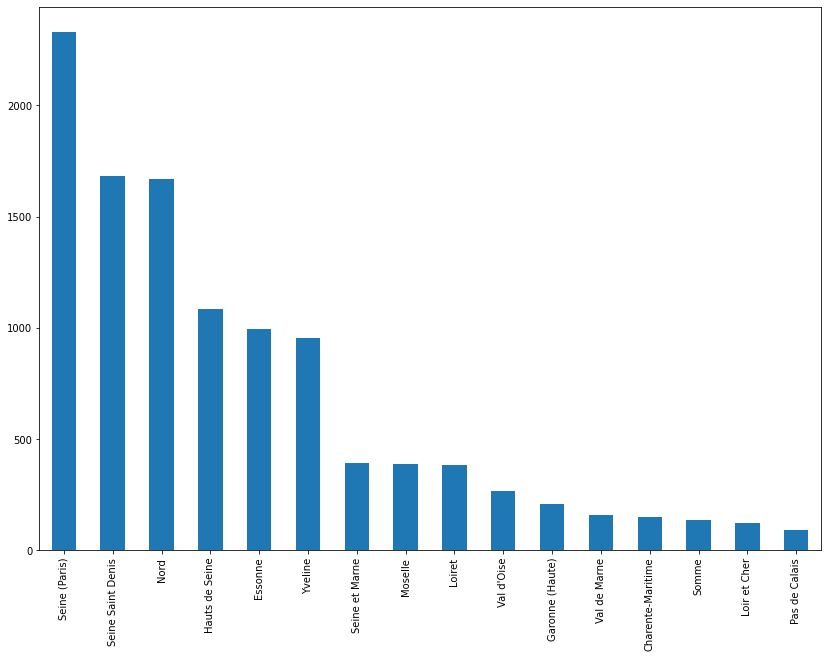

In [64]:
### orders made in canada or france
# sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

### bike racks order made from canada
# sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

#### orders made by @ region in france
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
### ploting bar 
france_states.plot(kind='bar', figsize=(14,10))

<AxesSubplot:ylabel='Product_Category'>

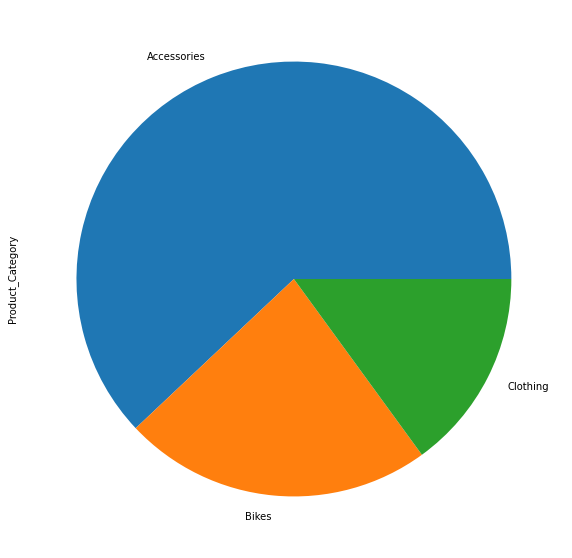

In [65]:
### sales per category
productCategory = sales['Product_Category'].value_counts()
##pie
productCategory.plot(kind='pie', figsize=(10,10))


<AxesSubplot:>

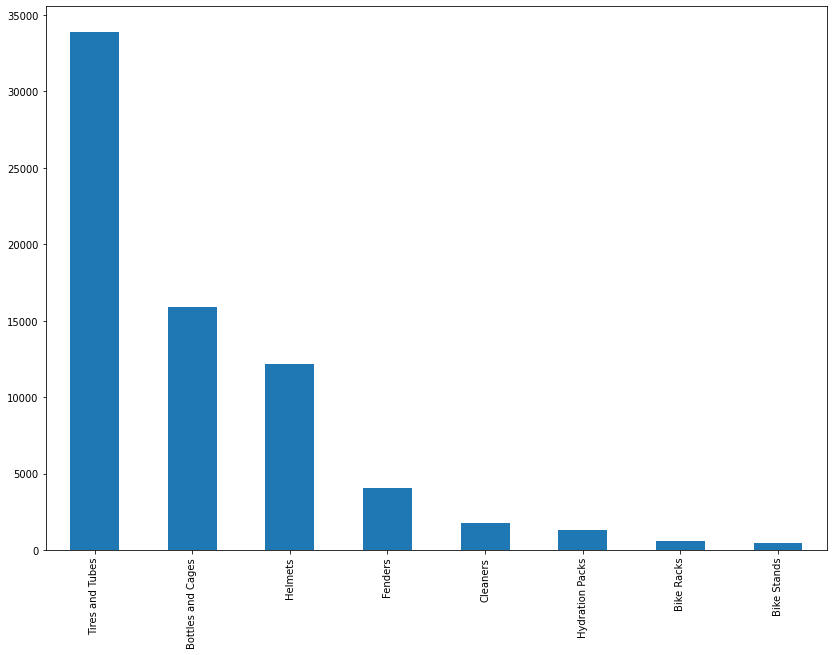

In [66]:
### sales @ accessory sub-categories
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
## bar plot
accessories.plot(kind='bar', figsize=(14,10))

<AxesSubplot:ylabel='Sub_Category'>

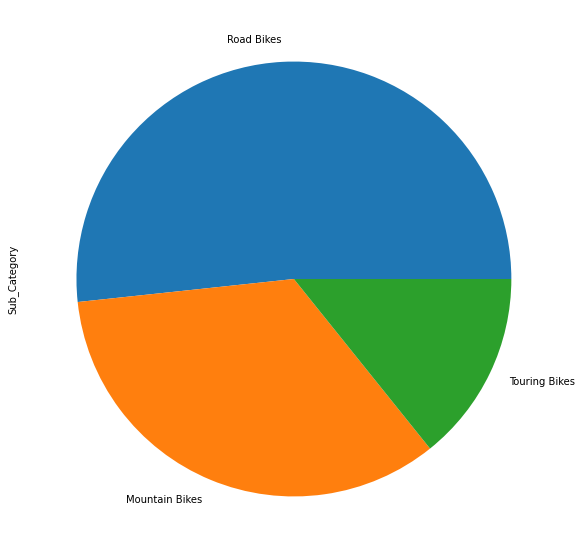

In [68]:
### orders made @ bike sub categories
bikes = sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].value_counts()
## pie plot
bikes.plot(kind='pie', figsize=(10,10))

Text(0, 0.5, 'sales')

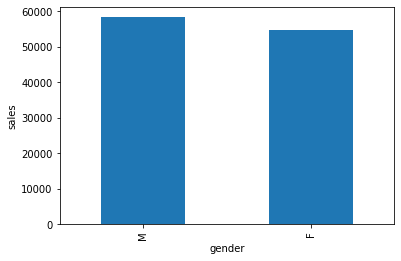

In [72]:
### gender with the most amnt of sales
gender_sales = sales['Customer_Gender'].value_counts().plot(kind='bar')
## plot bar
gender_sales.set_xlabel('gender')
gender_sales.set_ylabel('sales')

In [76]:
### sales of > 500 in revenue were made by men
# sales.loc[(sales['Customer_Gender'] == 'M')&(sales['Revenue'] > 500)].shape[0]

### top 5 sales with highest  revenue
sales.sort_values(['Revenue'], ascending=False).head(5)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54169,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14412,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14269,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14269,2011-09-30


In [80]:
### sales with the highest revenue
cond = sales['Revenue'] == sales['Revenue'].max()
sales.loc[(cond)]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-07-24


In [ ]:
### mean order quantiy of orders with more than 10k in revenue
# cond = sales['Revenue']  > 10_000
# sales.loc[cond, 'Order_Quantity'].mean()

## orders made in may 2016
# cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')
# sales.loc[cond].shape[0]

## orders nade between may and july of 2016
# cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))
# sales.loc[cond].shape[0]

## add 7.2% tax on every sale unit_price within united states
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072
sales.loc[sales['Country'] == 'United States', 'Unit_Price'].plot(kind='bar')